In [3]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [8]:
N = 4 # runs
Kx_family = 'step'
Kx = [[4]]
Kb = [[2]] # Polynomial
Ky = 2
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
Sigma_decay = 0
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay)

### J matrix

In [9]:
f_on_f_model.get_Jcb()

array([[1.     , 0.     , 0.     ],
       [0.     , 0.25   , 0.03125],
       [0.     , 0.25   , 0.09375],
       [0.     , 0.25   , 0.15625],
       [0.     , 0.25   , 0.21875]])

### Sigma matrix

In [10]:
f_on_f_model.get_Sigma()

array([[1., 0.],
       [0., 1.]])

### Optimize design

In [11]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 838.62it/s]


Best objective value (A): 17.5


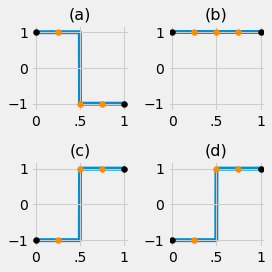

In [12]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_f_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

### B-spline for X